# <div align="left"> Uso de dados para Ciências da Terra e Ambiental em Python 1 (CTP1) </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Logo_UFF_%28blue%29.svg/320px-Logo_UFF_%28blue%29.svg.png" alt="drawing" style="width:200px;"/>
<img src="https://www.cnrd.info/files/2016/01/logo_geociencias_uff-250x87.jpg" alt="drawing" style="width:200px;"/>
<img src="https://ppgdot.sipos.com.br/interface/images/logo-programa-colorido.png" alt="drawing" width="200";"/>

Professor: Leonardo Miquelutti

Material provided by EarthLab under [CC BY-NC-ND 4.0](https://www.earthdatascience.org/license/)
[Copyright (c) Earth Lab](https://www.earthdatascience.org)

# Atividade Prática 05 - Análise de Séries Temporais



# Parte 1 - dados climáticos do Brasil

Nessa atividade, você lidará com dados climáticos do Brasil.

## Download dos dados

Primeiramente, execute a célula abaixo e clique em **RESTART RUNTIME**.


In [1]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Agora, importe as bibliotecas necessárias e crie a pasta `data`.

In [2]:
import os
import urllib.request
import zipfile
import shutil
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set working directory
os.chdir('/content')

# make `data` directory
os.mkdir('/data')

In [4]:
os.makedirs('/data', exist_ok=True)

A função `get_inmet_files` baixa os dados climáticos de uma única estação da base de dados do *Instituto Nacional de Metereologia* (INMET).

In [5]:
# get data from inmet
def get_inmet_files(id,
                    dst = 'data',
                    url = 'https://portal.inmet.gov.br/uploads/dadoshistoricos',
                    yr_start = 2000,
                    yr_end = 2018):
  """
  Download meteorological data from INMET

  Parameters
  ----------
  id : str
      The station ID is a code that you find at https://mapas.inmet.gov.br/,
      before the name of the selected station.
      Ex: 'A618' for station 'A618 - Teresópolis-Parque Nacional'

  dst : str
      destination folder

  url : str
      url for download. Currently works only for INMET data

  yr_start : int
      data starting year

  yr_end : int
      data ending year

  Returns
  -------
  None

  """
  # iterate over the years
  for year in range(yr_start,yr_end+1):

    # download data for `year`
    filename = os.path.join(dst, str(year) + '.zip')
    src = os.path.join(url, str(year) + '.zip')
    urllib.request.urlretrieve(url = src,
                               filename = filename)
    print('\n')
    print('Downloaded', filename.partition('/')[-1], 'from', src)

    # iterate over the csv files in the zip file
    archive = zipfile.ZipFile(filename, 'r')
    for input_file in archive.namelist():
      # looks for desired station
      if input_file.find(id) != -1:
        # extract, copy, and remove files
        with zipfile.ZipFile(filename, 'r') as zipObj:
          zipObj.extract(input_file)
          shutil.copyfile(input_file, 'data/' + input_file.partition('/')[-1])
          os.remove(input_file)
          os.rmdir(input_file.partition('/')[0])
        print('Extracted', input_file)

    # delete zip file
    os.remove(filename)

Para pegar os dados:

1. veja as estações disponíveis em https://mapas.inmet.gov.br/.
1. escolha uma estação **AUTOMÁTICA** (círculo verde) de um local que tenha alguma relevância para você, **preferencialmente** fora da Grande Rio.
1. Veja seu **id**, o número relacionado ao nome. Por exemplo, Uberlândia tem o id `A507`
1. coloque o **id** no campo apropriado na célula abaixo (atualmente preenchida com o código `A507`)
1. Execute a célula abaixo. Os dados de cada ano disponível aparecerá na pasta `data`.

In [6]:
#escolhido o ID A404 - LUIZ EDUARDO MAGALHAES - BA
id = 'A404'
get_inmet_files(id)



Downloaded 2000.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2000.zip


Downloaded 2001.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2001.zip


Downloaded 2002.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2002.zip
Extracted 2002/INMET_NE_BA_A404_LUIZ EDUARDO MAGALHAES_18-04-2002_A_31-12-2002.CSV


Downloaded 2003.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2003.zip
Extracted 2003/INMET_NE_BA_A404_LUIZ EDUARDO MAGALHAES_01-01-2003_A_31-12-2003.CSV


Downloaded 2004.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2004.zip
Extracted 2004/INMET_NE_BA_A404_LUIZ EDUARDO MAGALHAES_01-01-2004_A_31-12-2004.CSV


Downloaded 2005.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2005.zip
Extracted 2005/INMET_NE_BA_A404_LUIZ EDUARDO MAGALHAES_01-01-2005_A_31-12-2005.CSV


Downloaded 2006.zip from https://portal.inmet.gov.br/uploads/dadoshistoricos/2006.zip
Extracted 2006/INMET_NE_BA_A404_LUIZ EDUARDO MAGALHA

## Importação dos dados

Abaixo está um exemplo para importar **um único arquivo** do INMET como `pandas DataFrame` usando a função `read_csv`.

```python
filename = "/content/data/INMET_SE_MG_A507_UBERLANDIA_01-01-2005_A_31-12-2005.CSV"
data = pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",")
```

Como no Brasil o separador decimal é a vírgula, geralmente, isso deve ser especificado como argumento de importação.

## Exercício 01

Importe um arquivo e descubra o valor do `na_values`.

In [7]:
# Exercício 01
filename = "/content/data/INMET_NE_BA_A404_LUIZ EDUARDO MAGALHAES_18-04-2002_A_31-12-2002.CSV"
data_lem = pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",", parse_dates=['DATA (YYYY-MM-DD)'], index_col =['DATA (YYYY-MM-DD)'] )
data_lem

,HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
DATA (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,
2002-04-18,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,NaN
2002-04-18,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,NaN
2002-04-18,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,NaN
2002-04-18,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,NaN
2002-04-18,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-12-31,19:00,0.0,926.3,926.8,926.3,2094,27.6,20.0,28.0,26.4,20.3,18.1,66,59,63,49,3.5,2.1,NaN
2002-12-31,20:00,0.0,926.2,926.3,926.1,831,26.6,20.1,27.7,26.6,20.6,19.5,69,61,67,95,4.2,2.1,NaN
2002-12-31,21:00,0.0,926.9,926.9,926.2,308,25.8,20.7,26.6,25.8,21.0,20.0,74,67,74,85,3.0,2.0,NaN


In [8]:
#descobrindo os na_values
data_lem_cleam = pd.read_csv(filename, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",", parse_dates=['DATA (YYYY-MM-DD)'], index_col =['DATA (YYYY-MM-DD)'], na_values = ['-9999.000000'] )
data_lem_cleam.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
count,5642.000000,5646.000000,5644.000000,5644.000000,2954.000000,5646.000000,5646.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5646.000000,5642.000000,5640.000000,5646.000000,0.0
mean,0.103403,928.775151,929.032318,928.516371,1745.011171,24.064524,13.328409,24.861091,23.279979,13.873760,12.788218,58.757087,52.060418,55.368225,138.036157,5.631950,3.065817,NaN
std,1.344502,2.364839,2.350946,2.361506,1208.624489,4.869652,3.940570,4.856467,4.842349,3.843782,4.032692,21.009360,20.673656,20.961796,75.160657,2.597194,1.609253,NaN
min,0.000000,921.800000,922.200000,921.800000,0.000000,10.900000,-1.500000,12.800000,10.600000,-0.600000,-2.600000,12.000000,11.000000,12.000000,1.000000,0.400000,0.000000,NaN
25%,0.000000,927.100000,927.400000,926.900000,645.000000,20.400000,10.500000,21.000000,19.800000,11.000000,9.900000,41.000000,34.000000,38.000000,90.000000,3.700000,1.900000,NaN
50%,0.000000,928.800000,929.100000,928.500000,1728.500000,23.600000,12.900000,24.500000,22.800000,13.400000,12.400000,59.000000,50.000000,54.000000,118.000000,5.300000,3.000000,NaN
75%,0.000000,930.400000,930.600000,930.200000,2849.250000,28.000000,16.500000,28.900000,27.100000,17.000000,16.000000,76.000000,68.000000,72.000000,163.000000,7.400000,4.100000,NaN
max,59.800000,936.100000,936.100000,935.800000,4099.000000,35.600000,21.700000,36.600000,35.100000,22.500000,21.400000,97.000000,97.000000,97.000000,360.000000,22.400000,10.000000,NaN


## Concatenando `pandas DataFrame`

A função `pd.concat()` concatena dois ou mais `pandas DataFrame`.

Por exemplo, `result = pd.concat([df1, df2])` concatena os DataFrames `df1` e  `df2` em `result`.

## Exercício 02

Construa um `for` na célula abaixo para concatenar em um único `pandas DataFrame` todos os arquivos contidos na pasta `data`.
Em seguida, use o método `.set_index()` (por exemplo, `data.set_index('nome-da-coluna',inplace=True)`) para definir a coluna das datas como índice.
* Dica 01: pacote `glob` descrito na [Aula 04 - Fundamental de Python VI - if](https://colab.research.google.com/drive/15C_BtbQ1vazt1r8042T8DEAHFGTOM3aO?usp=sharing).
* Dica 02: use `data = pd.DataFrame()` para criar um DataFrame vazio.
* Dica 03: olhe a seção _Expand Loop To Include More Tasks_ da [Aula 03 - Fundamental de Python V - loops](https://colab.research.google.com/drive/14WFICVwSdzha6aIqeK6xxBRGswWnUGK5?usp=sharing).

Apesar das dicas, a forma como você lê e concatena os `DataFrame` é opcional.
**Entretanto, é obrigatório usar um `for` para isso.**
**E não se esqueça dos seguintes argumentos na hora de importar os dados:**
*  `na_values` (descoberto no Exercício 01)
*  `parse_dates`. Clique [aqui](https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e) para encontrar auxílio sobre como usar `parse_dates` quando há mais de uma coluna com datas.

In [9]:
'''

# exercício 02 - concatenar
import os
import pandas as pd

# Criar uma lista vazia para armazenar todos os DataFrames
data_frames = []

# Iterar sobre todos os arquivos na pasta 'data' com extensão .csv
for filename in os.listdir('data'):
    if filename.endswith('.csv'):
        # Ler o arquivo como um DataFrame e adicioná-lo à lista
        data_frames.append(pd.read_csv(os.path.join('data', filename)))

# Concatenar todos os DataFrames na lista em um único DataFrame
concatenated_data = pd.concat(data_frames)

# Definir a coluna de datas como índice
concatenated_data.set_index('nome-da-coluna', inplace=True)

'''

"\n\n# exercício 02 - concatenar\nimport os\nimport pandas as pd\n\n# Criar uma lista vazia para armazenar todos os DataFrames\ndata_frames = []\n\n# Iterar sobre todos os arquivos na pasta 'data' com extensão .csv\nfor filename in os.listdir('data'):\n    if filename.endswith('.csv'):\n        # Ler o arquivo como um DataFrame e adicioná-lo à lista\n        data_frames.append(pd.read_csv(os.path.join('data', filename)))\n\n# Concatenar todos os DataFrames na lista em um único DataFrame\nconcatenated_data = pd.concat(data_frames)\n\n# Definir a coluna de datas como índice\nconcatenated_data.set_index('nome-da-coluna', inplace=True)\n\n"

In [10]:
#criando uma lista com todos os arquivos na pasta data
import glob
caminhos_arquivos = glob.glob('/content/data/*')

arquivos_dataframe = pd.DataFrame()

#usando o loop para ler cada arquivo na pasta data dentro da variavel df e adicionar cada variavel df a lista arquivos_dataframe

for arquivo in caminhos_arquivos:
    df = pd.read_csv(arquivo, delimiter=';', header=8, encoding = "ISO-8859-1", engine='python', decimal=",", parse_dates=['DATA (YYYY-MM-DD)'], index_col =['DATA (YYYY-MM-DD)'], na_values = ['-9999.000000'],)
    arquivos_dataframe = arquivos_dataframe.append(df)

<ipython-input-10-b80dd795223c>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arquivos_dataframe = arquivos_dataframe.append(df)
<ipython-input-10-b80dd795223c>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arquivos_dataframe = arquivos_dataframe.append(df)
<ipython-input-10-b80dd795223c>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arquivos_dataframe = arquivos_dataframe.append(df)
<ipython-input-10-b80dd795223c>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arquivos_dataframe = arquivos_dataframe.append(df)
<ipython-input-10-b80dd795223c>:11: FutureWarning: The frame.append method is deprecated and will be removed fro

In [11]:
#vizualizando
arquivos_dataframe

,HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
DATA (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,
2007-01-01,00:00,0.0,928.9,929.0,928.7,NaN,21.4,20.0,21.4,21.2,20.0,19.8,92.0,91.0,92.0,200.0,2.4,0.0,NaN
2007-01-01,01:00,0.0,929.1,929.2,928.9,NaN,21.7,20.4,21.9,21.4,20.6,20.0,92.0,92.0,92.0,337.0,3.2,2.1,NaN
2007-01-01,02:00,0.0,928.7,929.2,928.6,NaN,21.1,19.7,21.7,20.9,20.3,19.5,92.0,91.0,92.0,155.0,3.2,0.6,NaN
2007-01-01,03:00,0.0,928.9,928.9,928.5,NaN,21.4,20.0,21.4,21.1,20.1,19.7,92.0,92.0,92.0,175.0,4.5,1.7,NaN
2007-01-01,04:00,0.0,928.2,929.0,928.2,NaN,21.0,19.6,21.4,21.0,20.0,19.6,92.0,91.0,91.0,226.0,3.2,0.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31,19:00,0.0,922.5,922.6,922.3,785.0,22.3,19.1,23.0,21.9,20.2,18.6,86.0,77.0,82.0,99.0,9.9,4.4,NaN
2010-12-31,20:00,0.6,923.1,923.1,922.5,332.0,20.8,19.1,22.6,20.7,19.6,18.8,91.0,81.0,90.0,83.0,8.7,5.2,NaN
2010-12-31,21:00,2.8,924.0,924.0,923.1,85.3,21.0,19.5,21.0,20.7,19.5,19.0,92.0,90.0,91.0,72.0,8.6,1.7,NaN


In [12]:
# exercício 02 - índice
arquivos_dataframe.dtypes

HORA (UTC)                                                object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    float64
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          float64
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         float64
RADIACAO GLOBAL (KJ/m²)                                  float64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             float64
TEMPERATURA DO PONTO DE ORVALHO (°C)                     float64
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         float64
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         float64
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 float64
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 float64
UMIDADE RELATIVA DO AR, HORARIA (%)                      float64
VENTO, DIREÇÃO HORARIA (g

## Exercício 03

Crie um gráfico **em barras** da pluviosidade de todo o período de dados disponível, da maneira que se apresentou após a concatenação.
* Formate os rótulos do eixo x para ficar legígel
* adicione título
* adicione nome aos eixos x e y

In [13]:
import matplotlib.pyplot as plt

# make figures plot inline
plt.ion()

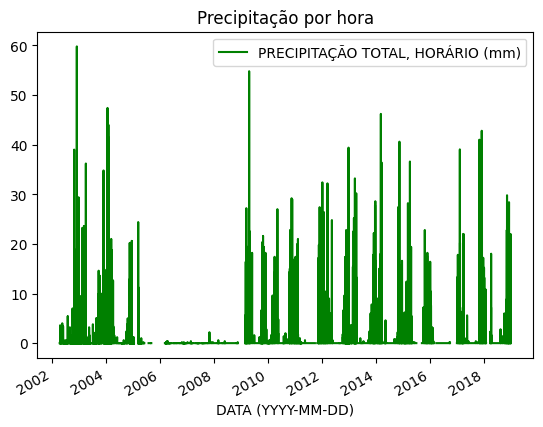

In [14]:
# exercício 03
arquivos_dataframe.plot(y='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                        #x=''
                        color='green',
                        title='Precipitação por hora')

# set standard plot parameters for uniform plotting
plt.rcParams['figure.figsize'] = (10, 6)

## Exercício 04

Crie 4 gráficos em barras da pluviosidade de todo o período de dados disponível reamostrado nas formas:
1. horária
1. diária
1. mensal
1. anual

Dicas:
* `fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)`
* se necesssário, formate os rótulos do eixo x para ficar legígel
* adicione título
* adicione nome aos eixos x e y

In [106]:
# exercício 04 - resample
arquivos_dataframe_hour = arquivos_dataframe.resample("H").sum()
arquivos_dataframe_day = arquivos_dataframe.resample("D").sum()
arquivos_dataframe_week = arquivos_dataframe.resample("W").sum()
arquivos_dataframe_year = arquivos_dataframe.resample("Y").sum()

NameError: ignored

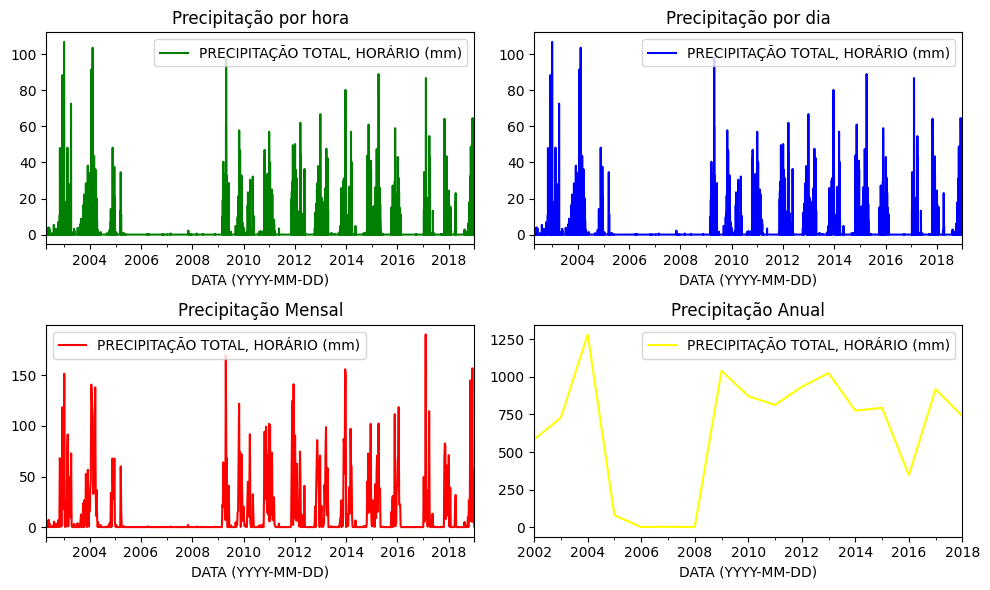

In [16]:
# exercício 04 - plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
arquivos_dataframe_hour.plot(y='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                        #x=''
                        color='green',
                        title='Precipitação por hora',
                             ax=ax1)
arquivos_dataframe_day.plot(y='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                        #x=''
                        color='blue',
                        title='Precipitação por dia',
                            ax=ax2)
arquivos_dataframe_week.plot(y='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                        #x=''
                        color='red',
                        title='Precipitação Mensal',
                             ax=ax3)
arquivos_dataframe_year.plot(y='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                        #x=''
                        color='yellow',
                        title='Precipitação Anual',ax=ax4)

plt.tight_layout()  # Ajusta o layout dos subplots
plt.show()  # Mostra o plot resultante

## Exercício 5

Faça gráficos horários e diários de **precipitação** (tipo barras) e **temperatura** (tipo linha - coluna `TEMPERATURA DO AR - BULBO SECO, HORARIA`), *no mesmo plot*, tanto para:
* o ano mais chuvoso
* o ano menos chuvoso

Gráfico similar ao **Desafio** da Atividade Prática 02, que combina barras + linha.

A precipitação deve ser reamostrada pela soma, enquanto a temperatura deve ser reamostrada pela média.

In [17]:
# exercício 5
#descobindo o ano mais chuvoso
df_odenado = arquivos_dataframe_year.sort_values(by='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', ascending=False)
df_odenado

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
DATA (YYYY-MM-DD),,,,,,,,,,,,,,,,,,
2004-12-31,1281.6,7589944.4,7598666.1,7594343.5,7390890.0,192104.6,124443.8,197518.4,185602.7,128322.5,119875.9,551144.0,498494.0,526568.0,1620896.0,35925.6,20136.4,0.0
2009-12-31,1040.0,6671336.0,6672617.3,6668530.9,5851917.1,166969.6,113697.9,172324.4,161616.2,117167.1,110151.7,504252.0,458455.0,481649.0,1086307.0,36886.2,17274.7,0.0
2013-12-31,1024.8,7816084.5,7817405.9,7812953.1,7135606.8,202374.2,131247.0,209119.2,195842.0,135790.9,126780.4,558476.0,504469.0,531723.0,1245973.0,47606.0,23305.3,0.0
2012-12-31,934.4,7891363.8,7891237.3,7886370.9,7277201.8,201739.9,122326.6,208585.5,194865.5,126842.8,117865.7,543097.0,486272.0,514866.0,1243817.0,49136.1,26238.3,0.0
2017-12-31,918.4,8136046.9,8138341.2,8133751.3,7547664.1,209189.9,131905.3,216423.4,202364.4,136437.8,127500.8,574925.0,521704.0,548568.0,1282197.0,49350.9,23425.0,0.0
2010-12-31,872.0,8121305.6,8124032.3,8118970.4,7499305.1,205256.3,133740.8,211923.2,198700.8,138210.2,129431.3,589239.0,532831.0,561077.0,1307429.0,46034.0,19623.4,0.0
2011-12-31,813.2,8120086.3,8122824.5,8117763.4,7077661.0,200077.6,134770.8,206673.2,193606.3,139304.0,130311.8,614552.0,558085.0,586780.0,1278347.0,35737.6,12312.7,0.0
2015-12-31,793.8,6489375.0,6491278.3,6487460.6,6164614.8,170764.1,113806.7,176494.2,165297.4,118275.1,109634.8,479702.0,433196.0,456426.0,1045052.0,37430.0,17804.8,0.0
2014-12-31,775.2,8136580.6,8138864.3,8134282.8,7538584.7,208263.2,134097.5,215414.4,201475.3,138885.0,129552.6,582034.0,527019.0,554716.0,1235795.0,48993.1,24248.0,0.0


In [105]:
#criando o df somente com o ano mais chuvoso
df_ano_chuvoso = arquivos_dataframe["2004"]
df_ano_chuvoso.head(5)

<ipython-input-105-f06d3bb74b09>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



,HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
DATA (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,
2004-01-01,00:00,0.0,926.3,926.3,925.8,NaN,25.1,18.2,25.8,25.1,18.4,17.1,66.0,59.0,65.0,8.0,2.7,0.1,NaN
2004-01-01,01:00,0.0,926.9,926.9,926.3,NaN,23.8,18.8,25.6,23.8,19.4,17.0,74.0,59.0,74.0,253.0,1.6,1.5,NaN
2004-01-01,02:00,0.0,927.0,927.0,926.8,NaN,23.8,18.6,24.5,23.5,19.3,18.4,77.0,69.0,72.0,263.0,1.6,0.7,NaN
2004-01-01,03:00,0.0,926.7,927.0,926.7,NaN,22.2,18.8,24.1,22.1,19.4,18.3,84.0,70.0,81.0,245.0,2.7,2.0,NaN
2004-01-01,04:00,0.0,926.1,926.7,926.1,NaN,22.1,18.6,22.2,21.7,18.9,18.6,84.0,80.0,80.0,236.0,3.7,2.6,NaN


In [106]:
#criando o df somente com o ano menos chuvoso
df_ano_menos_chuvoso = arquivos_dataframe["2008"]
df_ano_menos_chuvoso.head(5)

<ipython-input-106-12c11ba1bbf2>:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



,HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
DATA (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,
2008-01-01,00:00,0.0,924.9,924.9,924.1,NaN,23.8,14.9,24.3,23.6,15.8,14.7,60.0,55.0,57.0,108.0,3.6,3.0,NaN
2008-01-01,01:00,0.0,925.8,925.8,924.9,NaN,23.7,15.5,24.5,23.5,15.9,14.3,62.0,53.0,60.0,123.0,5.2,2.2,NaN
2008-01-01,02:00,0.0,926.2,926.2,925.8,NaN,23.9,16.5,25.7,23.7,16.8,14.7,64.0,51.0,63.0,290.0,3.1,0.0,NaN
2008-01-01,03:00,0.0,926.1,926.3,926.0,NaN,22.6,16.9,23.9,22.6,17.1,16.1,70.0,62.0,70.0,305.0,3.1,1.0,NaN
2008-01-01,04:00,0.0,925.7,926.2,925.6,NaN,22.5,16.2,22.6,21.7,16.9,16.2,74.0,68.0,68.0,245.0,3.2,2.1,NaN


In [126]:
#remostrando para dia e hora o ano mais chuvoso
df_ano_chuvoso_hora_precip = df_ano_chuvoso.resample("H").sum()
df_ano_chuvoso_day_precip = df_ano_chuvoso.resample("D").sum()

df_ano_chuvoso_hora_temp = df_ano_chuvoso.resample("H").mean()
df_ano_chuvoso_day_temp = df_ano_chuvoso.resample("D").mean()

#remostrando para dia e hora o ano menos chuvoso
df_ano_menos_chuvoso_hora_precip = df_ano_menos_chuvoso.resample("H").sum()
df_ano_menos_chuvoso_day_precip = df_ano_menos_chuvoso.resample("D").sum()

df_ano_menos_chuvoso_hora_temp = df_ano_menos_chuvoso.resample("H").mean()
df_ano_menos_chuvoso_day_temp = df_ano_menos_chuvoso.resample("D").mean()

<ipython-input-126-3555084db327>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-126-3555084db327>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-126-3555084db327>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-126-3555084db327>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to F

In [127]:
df_ano_chuvoso_hora_temp

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
DATA (YYYY-MM-DD),,,,,,,,,,,,,,,,,,
2004-01-01 00:00:00,0.0,925.184615,925.538462,924.846154,1234.166667,26.907692,18.238462,28.130769,26.615385,18.946154,17.130769,63.923077,54.384615,61.384615,170.076923,3.130769,1.607692,NaN
2004-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-12-30 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-30 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-30 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


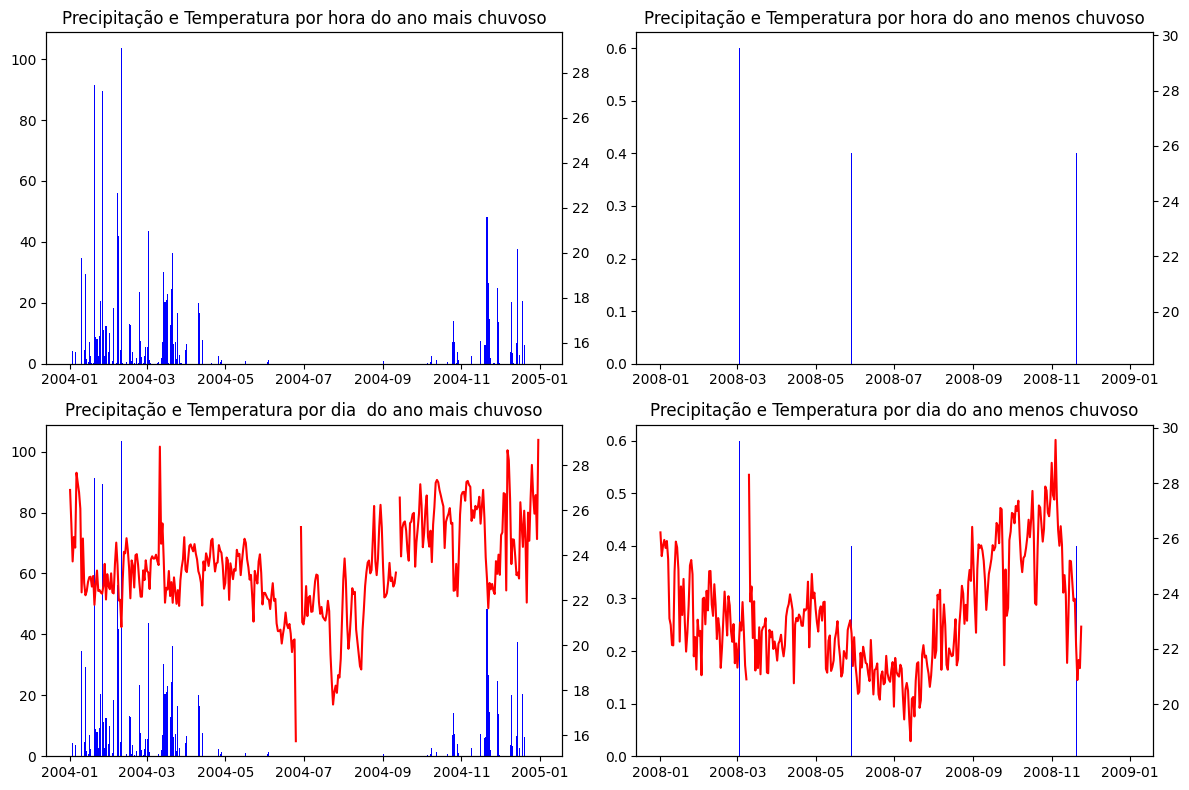

In [128]:
import matplotlib.pyplot as plt


# Criar os subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

#ANO MAIS CHUVOSO HORA

# Plotar o gráfico de barras para a precipitação
ax1.bar(df_ano_chuvoso_hora_precip.index, df_ano_chuvoso_hora_precip['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='blue')
ax1.set_title('Precipitação e Temperatura por hora do ano mais chuvoso')

# Criar um eixo secundário compartilhando o eixo x com o primeiro gráfico
ax1_sec = ax1.twinx()

# Plotar o gráfico de linha para a temperatura no eixo secundário
ax1_sec.plot(df_ano_chuvoso_hora_temp.index, df_ano_chuvoso_hora_temp['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], color='red')


#ANO MENOS CHUVOSO HORA

# Plotar o gráfico de barras para a precipitação
ax2.bar(df_ano_menos_chuvoso_hora_precip.index, df_ano_menos_chuvoso_hora_precip['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='blue')
ax2.set_title('Precipitação e Temperatura por hora do ano menos chuvoso')

# Criar um eixo secundário compartilhando o eixo x com o primeiro gráfico
ax2_sec = ax2.twinx()

# Plotar o gráfico de linha para a temperatura no eixo secundário
ax2_sec.plot(df_ano_menos_chuvoso_hora_temp.index, df_ano_menos_chuvoso_hora_temp['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], color='red')

#ANO MAIS CHUVOSO DIA

# Plotar o gráfico de barras para a precipitação
ax3.bar(df_ano_chuvoso_day_precip.index, df_ano_chuvoso_day_precip['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='blue')
ax3.set_title('Precipitação e Temperatura por dia  do ano mais chuvoso')

# Criar um eixo secundário compartilhando o eixo x com o primeiro gráfico
ax3_sec = ax3.twinx()

# Plotar o gráfico de linha para a temperatura no eixo secundário
ax3_sec.plot(df_ano_chuvoso_day_temp.index, df_ano_chuvoso_day_temp['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], color='red')

#ANO MENOS CHUVOSO DIA

# Plotar o gráfico de barras para a precipitação
ax4.bar(df_ano_menos_chuvoso_day_precip.index, df_ano_menos_chuvoso_day_precip['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='blue')
ax4.set_title('Precipitação e Temperatura por dia do ano menos chuvoso')

# Criar um eixo secundário compartilhando o eixo x com o primeiro gráfico
ax4_sec = ax4.twinx()

# Plotar o gráfico de linha para a temperatura no eixo secundário
ax4_sec.plot(df_ano_menos_chuvoso_day_temp.index, df_ano_menos_chuvoso_day_temp['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], color='red')



# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Parte 2 - vazão e período de retorno

## Plot 1

Use pandas to open and process the `data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.txt` txt file. Using this data, create a plot of **monthly maximum stream discharge from 1990-2014**.
Document your steps used to process the data in a markdown cell BELOW the plot
use pandas, make sure the dataframe has a datetime index
calculate a monthly max value

Subset the data to the time period: 1990-2014 using pandas syntax ["":""]. This means that your date column should be setup as an index.

In [82]:
# install necessary packages
!pip install hydrofunctions

import hydrofunctions as hf
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# set standard plot parameters for uniform plotting
plt.ion()
plt.rcParams['figure.figsize'] = (11, 6)

# prettier plotting with seaborn
import seaborn as sns;
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

%matplotlib inline

# Set working directory
os.chdir('/content') # COLAB

# make `data` directory
os.mkdir('data')

# define the site number and start and end dates that you are interested in
site = "06730200"
start = '1990-01-01'
end = '2014-12-30'

# then request data for that site and time period
longmont_resp = hf.get_nwis(site, 'dv', start, end, parameterCd='00060')

# get the data in a pandas dataframe format
longmont_discharge = hf.extract_nwis_df(longmont_resp.json())
longmont_discharge = longmont_discharge[0] # COLAB
longmont_discharge.tail()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=06730200&parameterCd=00060&startDT=1990-01-01&endDT=2014-12-30


,USGS:06730200:00060:00003,USGS:06730200:00060:00003_qualifiers
datetimeUTC,,
2014-12-26 00:00:00+00:00,27.8,A
2014-12-27 00:00:00+00:00,20.7,A
2014-12-28 00:00:00+00:00,22.0,A
2014-12-29 00:00:00+00:00,22.5,A
2014-12-30 00:00:00+00:00,22.3,"A,e"


In [83]:
# renomeando as colunas
longmont_discharge.columns = ["discharge", "flag"]
longmont_discharge.tail(5)
# criando uma coluna com  a vazao maxima de cada mes
max_vazao_mes = longmont_discharge['discharge'].resample('M').max()
#tranformando em df
df_vazao_maxima_mes = pd.DataFrame({'Vazao_Maxima': max_vazao_mes})
df_vazao_maxima_mes
#visuando graficamente
import plotly.graph_objects as go

#criando as linhas
trace = go.Scatter(x=df_vazao_maxima_mes.index,
                   y=df_vazao_maxima_mes['Vazao_Maxima'],
                   mode='lines',
                   line=dict(color='blue'))
#criando e configurando o layout do grafico
layout = go.Layout(title='Vazao maxima por mes',
                   xaxis=dict(title='Mês'),
                   yaxis=dict(title='Vazao'))
#criando a figura com a combinacao dos elementos trace e layout
fig = go.Figure(data=[trace],
                layout=layout)
fig.show()

Apos importar as bibiliotecas foi definifo o numero do local conforme solicitado pelo enuciado (06730200) e as datas de inicio e fim.
Atraves do comenado longmont_resp foi solicitado a bibilioteca Hydrofunctions  os dados de vazao para o local e data definidos.
Em seguida, os dados em formado json foram tranformados em dataframe.
De posso de dataframe como o periodo de vazao especifio foram renomeada as colunas e em seguida o dataframe longmont_discharge foi ramostrado para o nivem de mes agregado pelo valor maximo mensal. Em seguida foi plotado esse dados no grafico Vazao maxima por mes.

## Plot 2

Use pandas to open and process the `data/colorado-flood/discharge/06730200-discharge-daily-1986-2013.txt` txt file. Using this data, create a plot of daily maximum stream discharge from **Aug 01, 2013 to October 01, 2013**. Document your steps used to process the data in a markdown cell BELOW the plot use pandas, make sure the dataframe has a datetime index calculate a monthly max value

Subset the data temporally (by time) using pandas syntax `["":""]`. This means that your date column should be setup as an index in pandas.

In [69]:
#selecionando o intervalo ago/2013 a out2013
df_ago_out = longmont_discharge.loc['2013-08-01':'2013-10-30']
df_ago_out
#visuando graficamente
import plotly.graph_objects as go
#criando as linhas
trace = go.Scatter(x=df_ago_out.index,
                   y=df_ago_out['discharge'],
                   mode='lines',
                   line=dict(color='darkblue'))
#criando e configurando o layout do grafico
layout = go.Layout(title='Vazao por dia entre agosto a outubro',
                   xaxis=dict(title='Mês'),
                   yaxis=dict(title='Vazao'))
#criando a figura com a combinacao dos elementos trace e layout
fig = go.Figure(data=[trace],
                layout=layout)
fig.show()

De posse do dataframe longmont_discharge criado na etapa anterior atraves da funcao .loc foi selecioado apenas os meses de agosto a outubro de 2013 no dataframe  df_ago_out.Tendo em vista que o  df_ago_out exibe apenas uma medida de vazao por dia, nao foi preciso efetuar a reamostragem. Em seguida, atraves da bibilioteca plotly foi plotado o grafico com a relacao da vazao diaria para os dias entre 01/08/2013  a 30/10/2013.

## Plot 3
Use the `data/precipitation/805333-precip-daily-1948-2013.csv` file to create a plot of total (sum) monthly precipitation from 1990 to 2014.

Subset the data using pandas syntax `["":""]`. This means that your date column should be setup as an index.
* label the x and y axis of your plot with appropriate units
* Make sure the date labels on your x-axis are easily readable

In [91]:
# install necessary packages
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 70.4 MB/s eta 0:00:00


In [97]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
import urllib.request
import zipfile

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

# inputs
filename = "data/colorado-flood.zip"
url = "https://ndownloader.figshare.com/files/16371473"

# Set working directory
os.chdir('/content')

# make `data` directory
os.mkdir('data')

# Download the data
# data = et.data.get_data('colorado-flood')
urllib.request.urlretrieve(url = url, filename = filename)

('data/colorado-flood.zip', <http.client.HTTPMessage at 0x7fc03f932fe0>)

In [102]:
def read_my_zip( file_zip, file_csv, **kwargs):
    """Read one single file within the zip file with pandas_read_csv()

    Parameters
    ----------
    file_zip : str
        The zip file location
    file_csv : str
        The csv target-file within the zip file
    kwargs   : , optional
        Arguments for pandas.read_csv()

    Returns
    -------
    pandas DataFrame

    """
    with zipfile.ZipFile(file_zip) as z:
      with z.open(file_csv) as f:
        data = pd.read_csv(f, **kwargs)

    return data


path_csv = "precipitation/805333-precip-daily-1948-2013.csv"
precip_1948_2013 = read_my_zip(filename,
                                       path_csv,
                                       # Make sure the dates import in datetime format
                                       parse_dates = ["DATE"],
                                       # Set DATE as the index so you can subset data by time period
                                       index_col = ["DATE"],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values = ["999.99"])

precip_1948_2013.head()


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
1948-08-01 01:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.00,g,
1948-08-02 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.05,,
1948-08-03 09:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.01,,
1948-08-03 14:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,
1948-08-03 15:00:00,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,0.03,,


In [120]:
# criando uma coluna com  a vazao maxima de cada mes
precip_mes = df_1990_2014['HPCP'].resample('M').sum()
#tranformando em df
df_1990_2014_month = pd.DataFrame({'Soma precipitacao por mes': precip_mes})
df_1990_2014_month
#visuando graficamente
import plotly.graph_objects as go

#criando as linhas
trace = go.Scatter(x=df_1990_2014_month.index,
                   y=df_1990_2014_month['Soma precipitacao por mes'],
                   mode='lines',
                   line=dict(color='lightblue'))
#criando e configurando o layout do grafico
layout = go.Layout(title='Precipitação Mensal',
                   xaxis=dict(title='Mês'),
                   yaxis=dict(title='Preciputação'))
#criando a figura com a combinacao dos elementos trace e layout
fig = go.Figure(data=[trace],
                layout=layout)
fig.show()

## Plot 4:

Use the `data/precipitation/805333-precip-daily-1948-2013.csv` file. Create a plot of Daily total precipitation for aug 1 - October 1 2013. Use `pandas` to import and process your data. Make sure the dataframe has a datetime index

Subset the data using `pandas` syntax `["":""]`. This means that your date column should be setup as an index.

In [128]:
#select the time  aug 1 - October 1 2013
#selecionando o intervalo ago/2013 a out2013
df_precip_ago_out = precip_1948_2013.loc['2013-08-01':'2013-10-30']

# criando uma coluna com  a vazao maxima de cada dia do mes
precip_ago_out = df_precip_ago_out['HPCP'].resample('D').sum()
#tranformando em df
df_precip_ago_out = pd.DataFrame({'Soma precipitacao Diária': precip_ago_out})
df_precip_ago_out
#visuando graficamente
import plotly.graph_objects as go

#criando as linhas
trace = go.Scatter(x=df_precip_ago_out.index,
                   y=df_precip_ago_out['Soma precipitacao Diária'],
                   mode='lines',
                   line=dict(color='darkblue'))
#criando e configurando o layout do grafico
layout = go.Layout(title='Precipitação Mensal',
                   xaxis=dict(title='Mês'),
                   yaxis=dict(title='Precipitação'))
#criando a figura com a combinacao dos elementos trace e layout
fig = go.Figure(data=[trace],
                layout=layout)
fig.show()


## Document calculate_return function

The function below can be used to calculate the return values associated with a time series dataset. This function takes all of the code that we used in class and consolidates it into one small function call.

Add documentation to the function below including:

1. An overview of what the function does
2. The parameters that the function takes as input(s)
3. What the function returns

Check out the [rasterio mask functions](https://github.com/mapbox/rasterio/blob/960a906dad2a4e426387ce048a52c6e90afdcd2b/rasterio/mask.py) for guidance on how to properly document a function.

Note that rasterio also includes an example of how to use the function. You do not need to add this to your documentation.

In [23]:
# Create a function from the workflow below

# add an argument for annual vs daily...


def calculate_return(df, colname):
    '''
    Add Documentation Here


    '''
    sorted_data = df.sort_values(by=colname)
    n = sorted_data.shape[0]
    sorted_data.insert(0, 'rank', range(1, 1 + n))
    sorted_data["probability"] = (n - sorted_data["rank"] + 1) / (n + 1)
    sorted_data["return-years"] = (1 / sorted_data["probability"])

    return(sorted_data)

## Plot 5a & b - Return Period for Stream Discharge

### Step 1
Following the activity that we did together in class (or that you can view here),
use the hydrofunctions packages to import `dv` (daily value) stream discharge data from the USGS site: 06730500 into python. Use the start and end time periods listed below.

```
site = "06730500"
start = '1946-05-10'
end = '2018-08-29'
```
Calculate the annual maximum discharge value from this data.


### Step 2
Next, download the peak stream discharge annual max data from the USGS site. The URL and code to download the data are below.

```python
# download usgs annual max data from figshare
url = "https://nwis.waterdata.usgs.gov/nwis/peak?site_no=06730500&agency_cd=USGS&format=rdb"
download_path = "data/colorado-flood/downloads/annual-peak-flow.txt"
urllib.request.urlretrieve(url, download_path)
```

### Step 3
Then use the `calculate_return` function above to calculate return time on the annual max value data that you calculated and the annual max data that you downloaded using the code above.

For each step you will need to do some data cleaning.  Plot both datasets together as follows:

#### Plot 5A
* discharge of the x-axis and probability on the y-axis for each dataset (one plot)

#### Plot 5B
* Return period of the x-axis and Discharge (CFS) on the `y-axis` for each dataset (one plot)

[Use this lesson]({{site.url}}/courses/earth-analytics-python/use-time-series-data-in-python/floods-return-period-and-probability/) to help walk you through creating these plots. [Also use this notebook on github as a guide](https://github.com/earthlab-education/earth-analytics-fall-2018/blob/master/week-03/exceedance-probability-and-return-periods.ipynb)

We went through part of this lesson together in class.

In [24]:
## Plot 5a goes in this cell

In [25]:
## Plot 5b goes in this cell

## Plot 6 a & b

Create the same plots that you created above using the `data/colorado-flood/precipitation/805333-precip-daily-1948-2013.csv` data. For this plot you will not have a annual max file from USGS. Instead you will create both data sets.

The steps:

### Daily Sum Data

1. Summarize or `resample` the precipitation data to a `Daily (D) sum`.
2. Use the calculate_return function to calculate the return and probability for the data
3. Be sure to scale the return-years and probability column as we did with the discharge data. This means you will divide the return-years column by 365 and multiple the probability column by 365.

### Annual Max Data

1. Using the daily sum data that you calculated above, calculate the annual max total daily precipitation value.
2. Then calculate the return and probability using the calculate_return function on the annual max data.


#### Plot 6A

* discharge of the x-axis and probability on the y-axis for each dataset (one plot)
* plot the data on the y-axis on a log scale for best representation of differences in the data

#### Plot 6B

* Return period of the x-axis and Discharge (CFS) on the `y-axis` for each dataset (one plot)
* plot the data on the y-axis on a log scale for best representation of differences in the data


In [26]:
## Plot 6a goes in this cell

In [27]:
## Plot 6b goes in this cell